X.shape: (569, 30)
For n_clusters = 2 The average silhouette_score is : 0.6972646156059464
For n_clusters = 3 The average silhouette_score is : 0.6660201620263425
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.5102292997907838
For n_clusters = 6 The average silhouette_score is : 0.4857922435948332
For n_clusters = 7 The average silhouette_score is : 0.4676241057484445
For n_clusters = 8 The average silhouette_score is : 0.46824565183432537
For n_clusters = 9 The average silhouette_score is : 0.4621389195806988
For n_clusters = 10 The average silhouette_score is : 0.46672677982915495
avg_time: 0.1025356716579861


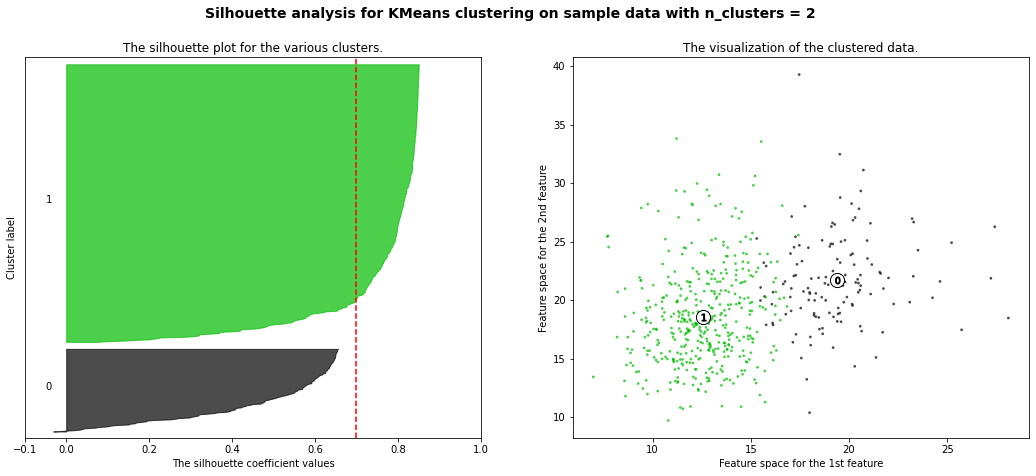

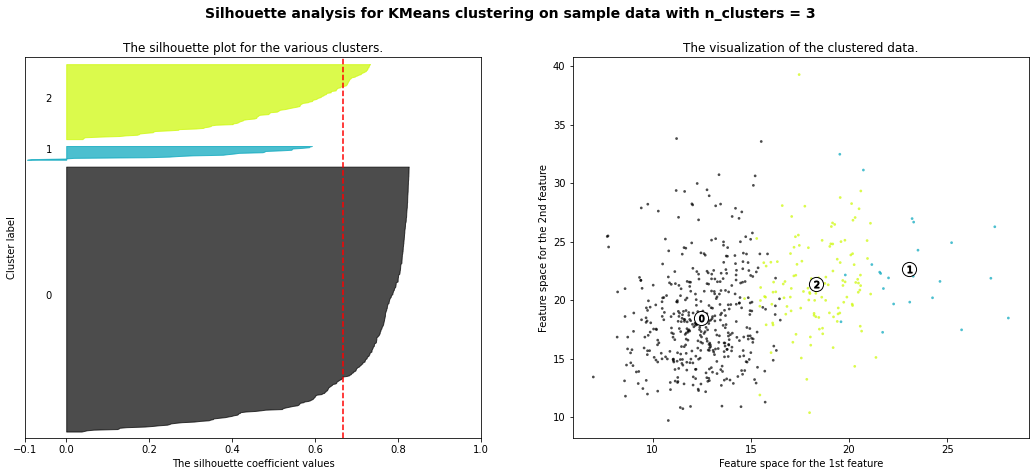

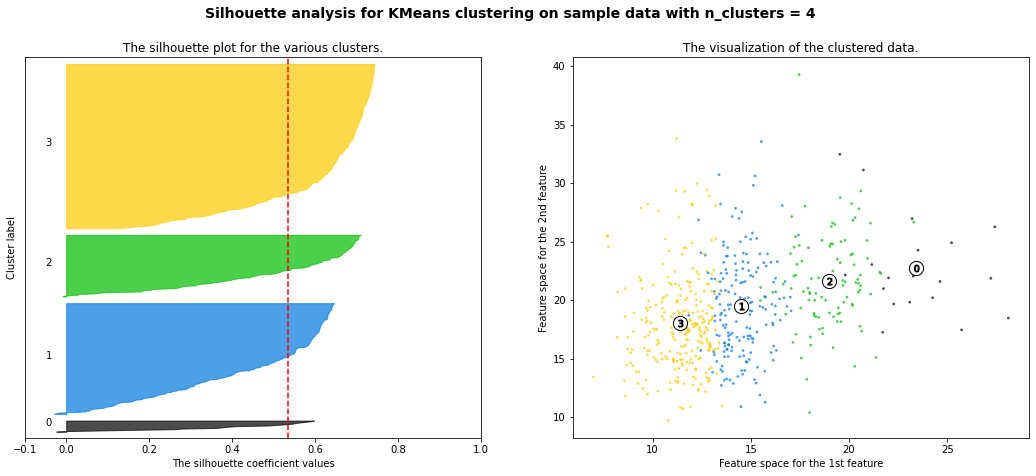

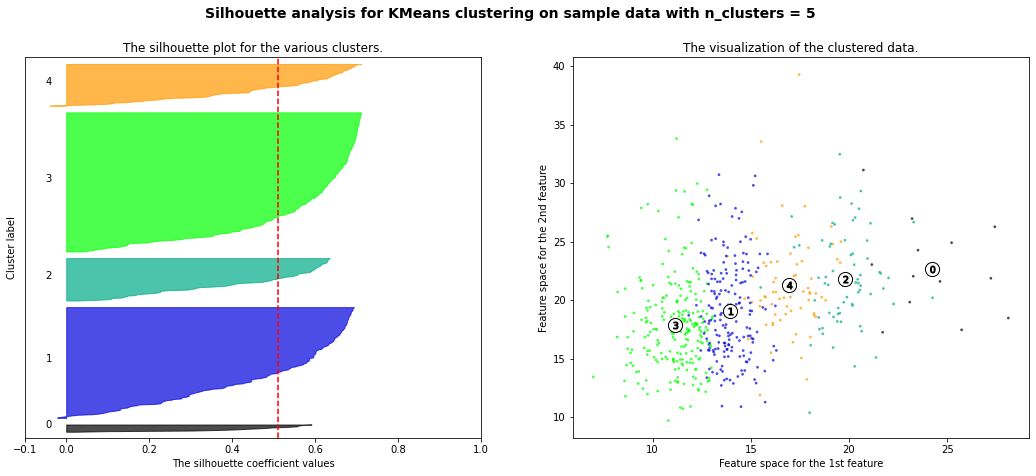

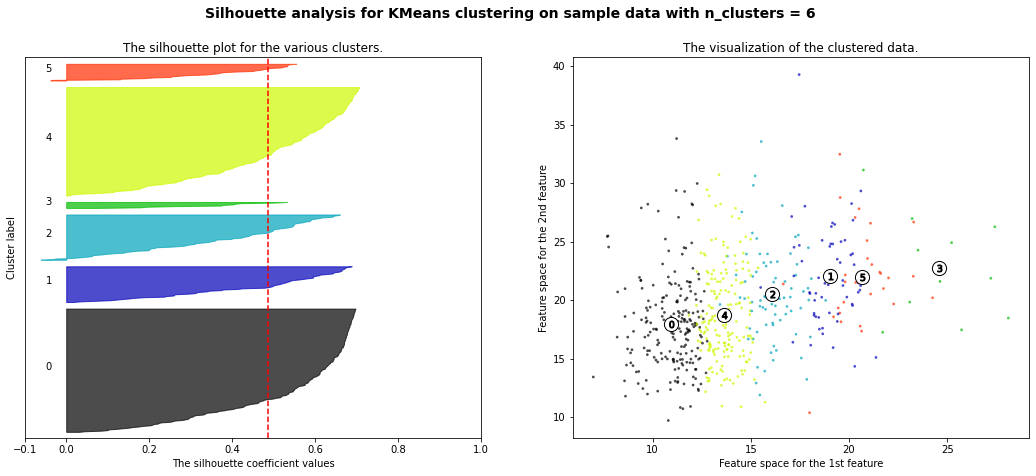

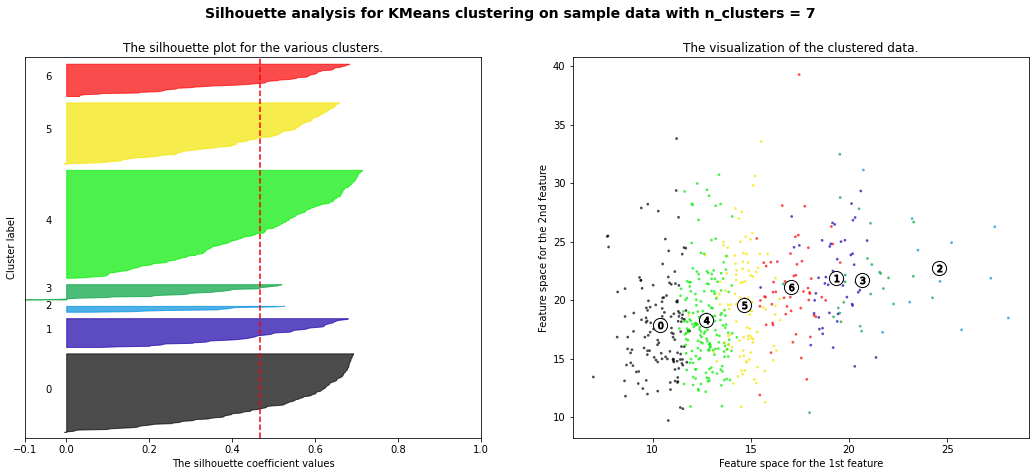

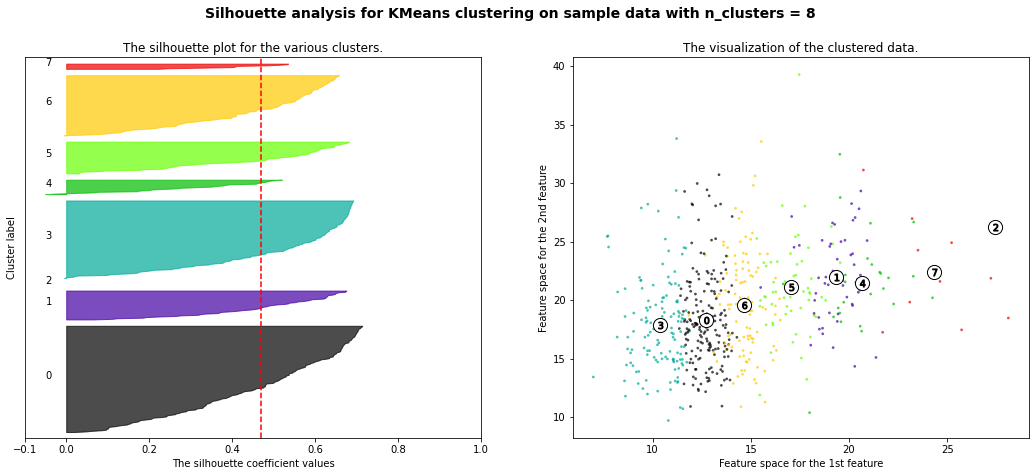

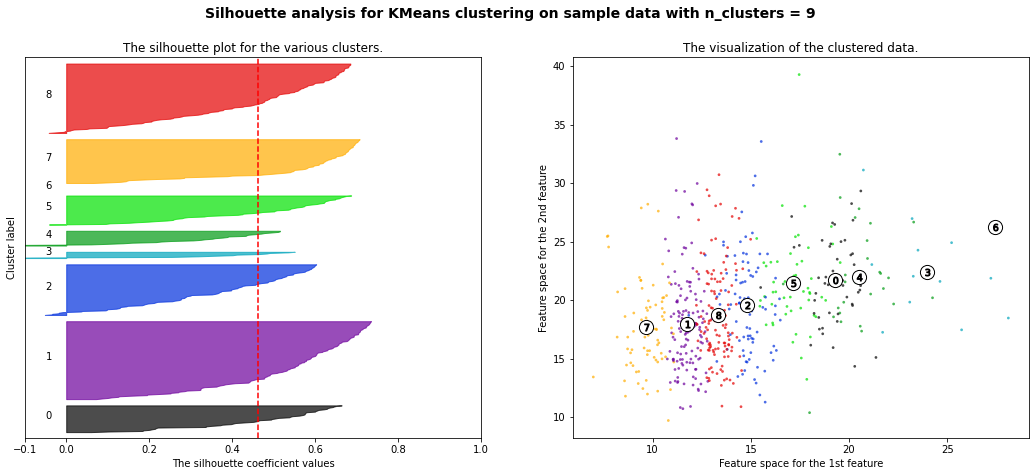

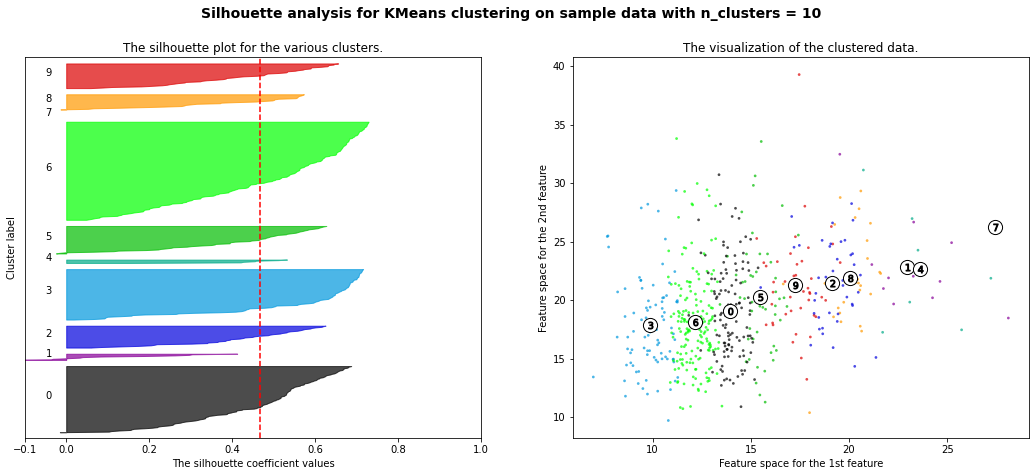

In [135]:
# 1a) k-means clustering with Breast Cancer data
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time

# breast cancer data
X, y = datasets.load_breast_cancer(return_X_y=True)
print("X.shape:", X.shape)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

start_time = time.time()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
end_time = time.time()
avg_time = (end_time - start_time)/len(range_n_clusters)
print("avg_time:", avg_time)
plt.show()



For n_components = 2 The average silhouette_score is : 0.31448870991364997
For n_components = 3 The average silhouette_score is : 0.26173626420120766
For n_components = 4 The average silhouette_score is : 0.2266727481956434
For n_components = 5 The average silhouette_score is : 0.1193506324479708
For n_components = 6 The average silhouette_score is : 0.12157971858264821
For n_components = 7 The average silhouette_score is : 0.1237943888391682
For n_components = 8 The average silhouette_score is : 0.1379604710798159
For n_components = 9 The average silhouette_score is : 0.10827536309455464
For n_components = 10 The average silhouette_score is : 0.12024618662425876
avg_time: 0.07103080219692653


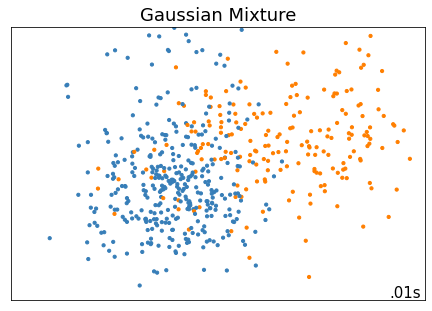

In [136]:
# 1b) Expectation Maximization with Breast Cancer data
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_samples, silhouette_score

n_samples = 500

X, _ = datasets.load_breast_cancer(return_X_y=True)
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

params = {
    "quantile": 0.3,
    "damping": 0.9,
    "preference": -200,
    "eps": 0.15,
    "n_neighbors": 2,
    "min_samples": 7,
    "xi": 0.1,
    "min_cluster_size": 0.2,
    "n_components": 2,
}


start_time = time.time()
range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_components in range_n_components:
    # Initialize the clusterer with n_clusters
    clusterer = mixture.GaussianMixture(
        n_components=n_components, covariance_type="full"
    )
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )
end_time = time.time()
avg_time = (end_time - start_time)/len(range_n_components)
print("avg_time:", avg_time)
# ============
# Create cluster objects
# ============
gmm = mixture.GaussianMixture(
    n_components=params["n_components"], covariance_type="full", random_state = 1, max_iter=1000
)


t0 = time.time()

# catch warnings related to kneighbors_graph
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    gmm.fit(X)

t1 = time.time()
if hasattr(gmm, "labels_"):
    y_pred = gmm.labels_.astype(int)
else:
    y_pred = gmm.predict(X)

plt.subplot(1, 1, plot_num)
plt.title("Gaussian Mixture", size=18)

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(
    0.99,
    0.01,
    ("%.2fs" % (t1 - t0)).lstrip("0"),
    transform=plt.gca().transAxes,
    size=15,
    horizontalalignment="right",
)
plot_num += 1

plt.show()

total time: 0.001953125
explained variance ratio (first two components): [0.98204467 0.01617649 0.00155751]


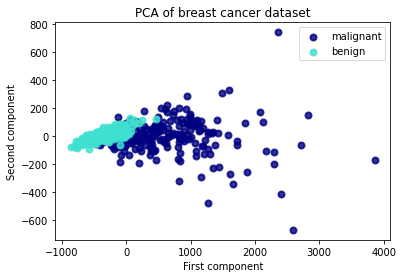

In [137]:
# 2a) PCA with Breast Cancer data
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
target_names = breast_cancer.target_names

pca = PCA(n_components=3)
start_time = time.time()
X_r = pca.fit(X).transform(X)
end_time = time.time()
print("total time:", end_time - start_time)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of breast cancer dataset")
plt.xlabel("First component")
plt.ylabel("Second component")

plt.show()

X.shape: (569, 30)
569 569 83
For n_clusters = 2 The average silhouette_score is : 0.6975889171800903
For n_clusters = 3 The average silhouette_score is : 0.6664290868848659
For n_clusters = 4 The average silhouette_score is : 0.534599715973914
For n_clusters = 5 The average silhouette_score is : 0.5116672922119121
For n_clusters = 6 The average silhouette_score is : 0.48748637094549035
For n_clusters = 7 The average silhouette_score is : 0.46989291043160464
For n_clusters = 8 The average silhouette_score is : 0.4704564978939892
For n_clusters = 9 The average silhouette_score is : 0.4735718764017001
For n_clusters = 10 The average silhouette_score is : 0.46954552404557004
avg_time 0.1013126638200548


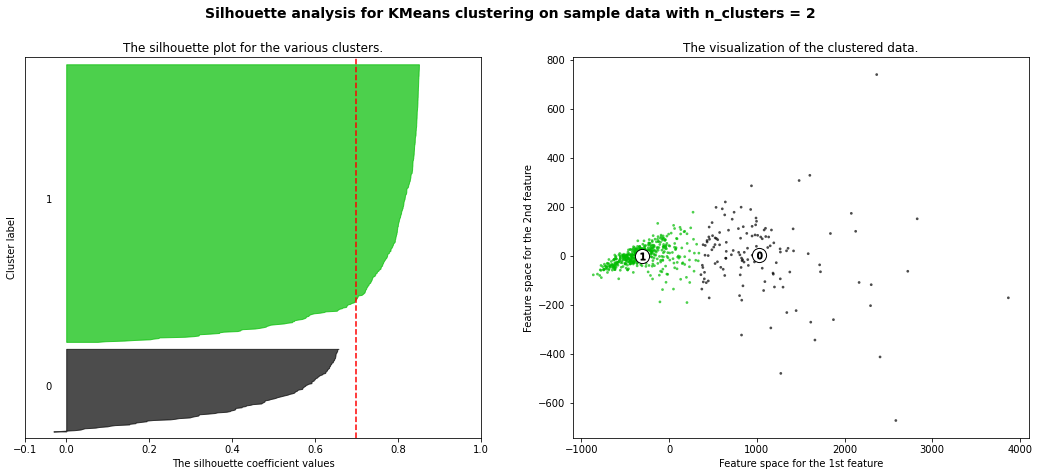

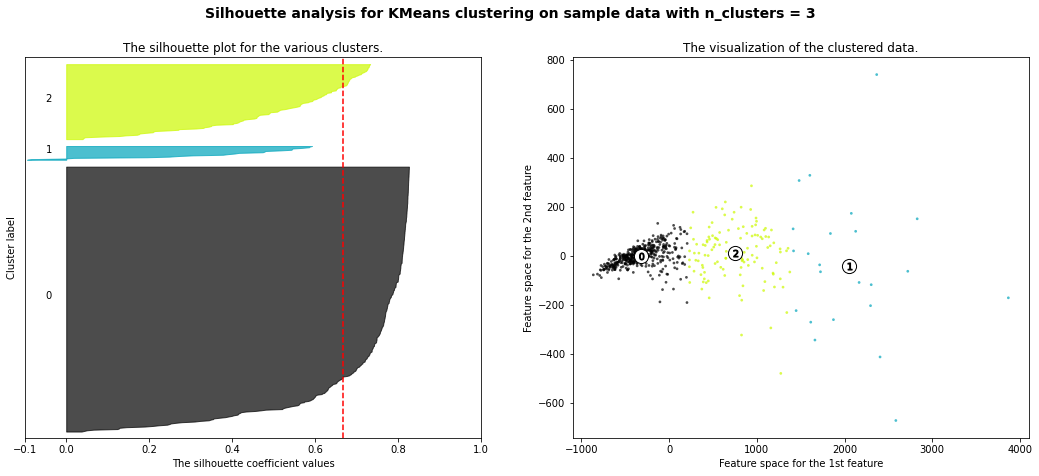

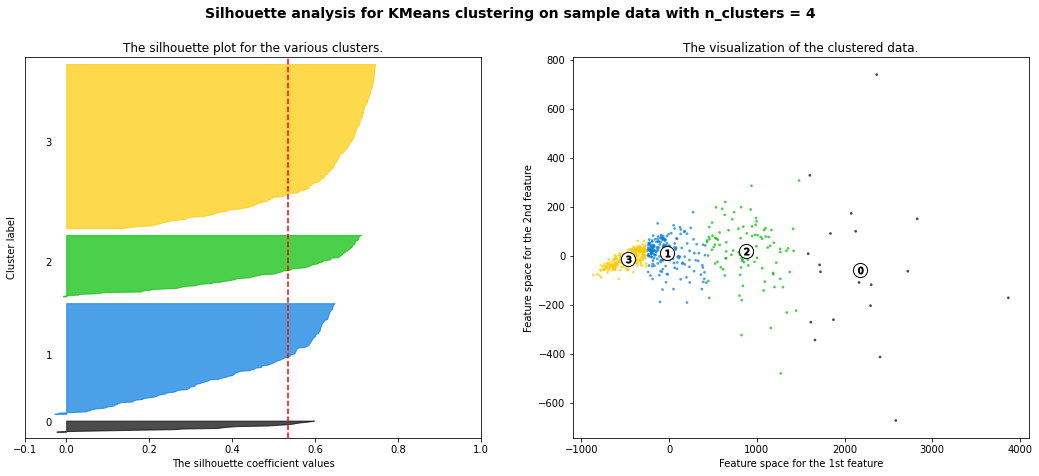

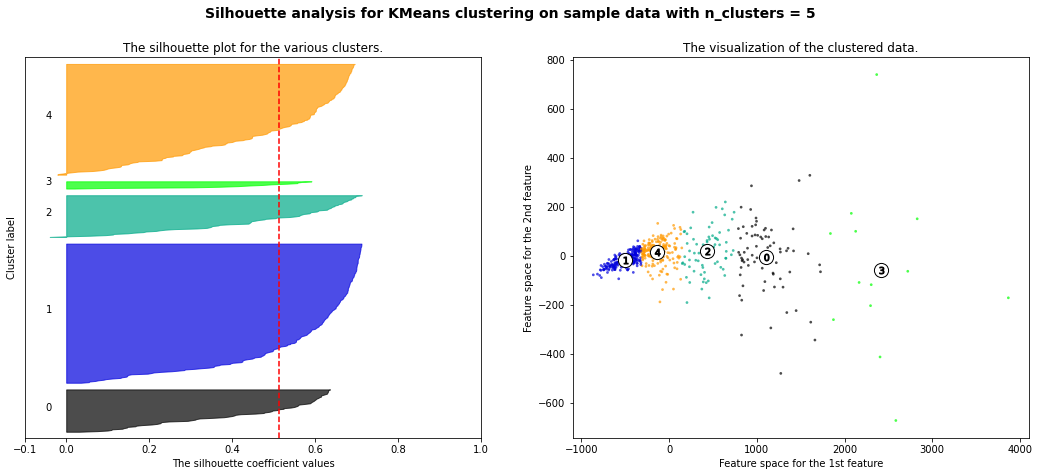

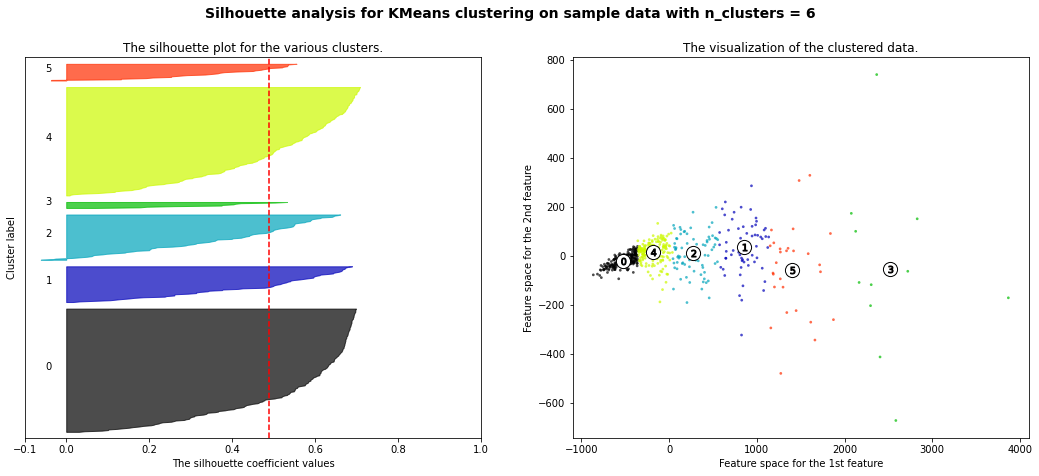

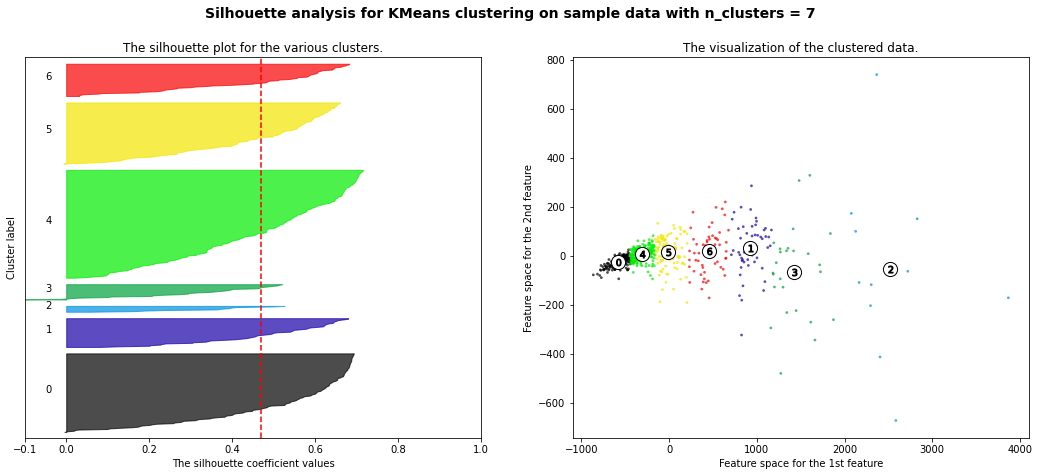

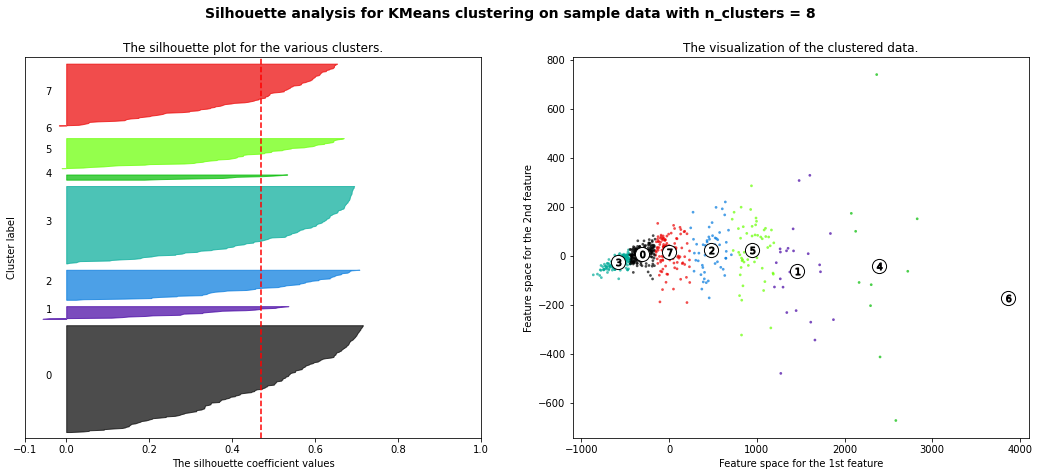

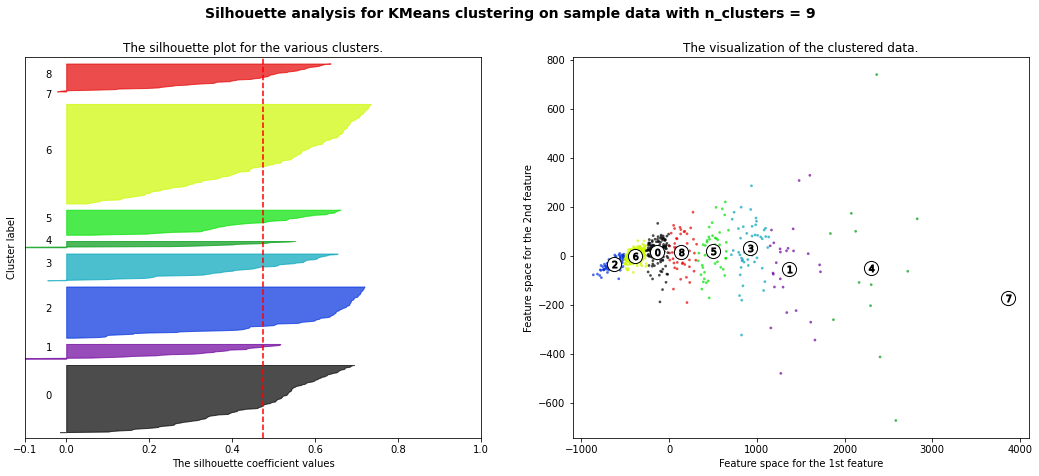

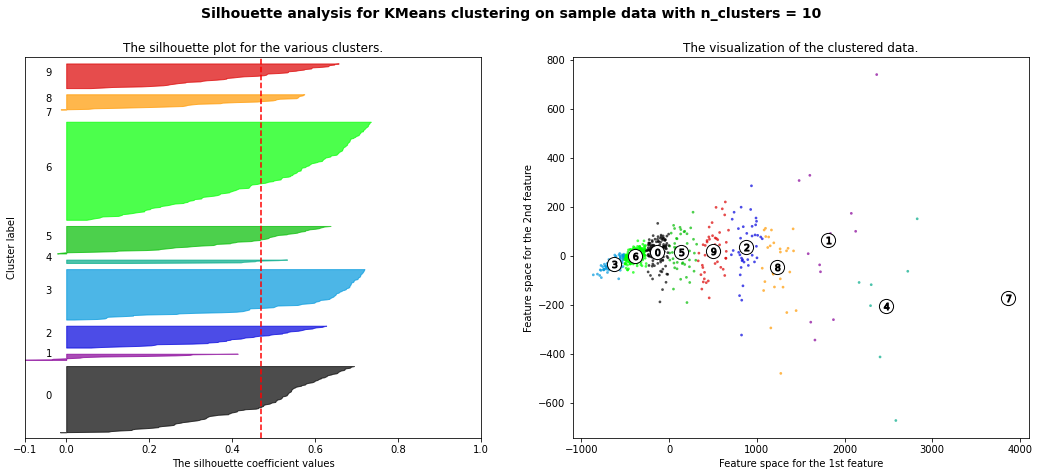

In [143]:
# 3a) k-means clustering on PCA with Breast Cancer data
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from time import time

# breast cancer data
# X, y = datasets.load_breast_cancer(return_X_y=True)
print("X.shape:", X.shape)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
start_time = time()
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_r) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_r)
    if n_clusters == 2:
        diff = cluster_labels - y
        sum_wrong = np.absolute(diff).sum()
        print(len(cluster_labels), len(y), sum_wrong)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_r, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_r, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_r[:, 0], X_r[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
end_time = time()
avg_time = (end_time - start_time)/len(range_n_clusters)
print("avg_time",avg_time)
plt.show()

569 569 49
For n_clusters = 2 The average silhouette_score is : 0.39902807775556093
For n_clusters = 3 The average silhouette_score is : 0.35327765370133607
For n_clusters = 4 The average silhouette_score is : 0.31611339999621796
For n_clusters = 5 The average silhouette_score is : 0.12591440317503666
For n_clusters = 6 The average silhouette_score is : 0.1284740017809103
For n_clusters = 7 The average silhouette_score is : 0.35589242973927493
For n_clusters = 8 The average silhouette_score is : 0.12312097872733913
For n_clusters = 9 The average silhouette_score is : 0.11782087486073403
For n_clusters = 10 The average silhouette_score is : 0.09180262033868478


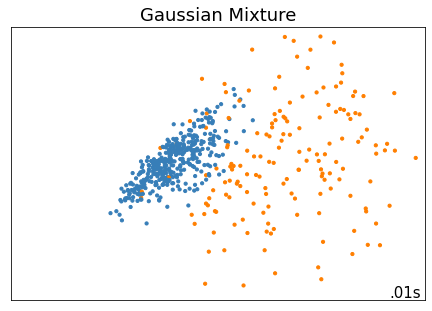

In [99]:
# 3a) Expectation Maximization on PCA with Breast Cancer data
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 500

# X, _ = datasets.load_breast_cancer(return_X_y=True)
# normalize dataset for easier parameter selection
X_r = StandardScaler().fit_transform(X_r)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

params = {
    "quantile": 0.3,
    "damping": 0.9,
    "preference": -200,
    "eps": 0.15,
    "n_neighbors": 2,
    "min_samples": 7,
    "xi": 0.1,
    "min_cluster_size": 0.2,
    "n_components": 2,
}



range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_components in range_n_components:
    # Initialize the clusterer with n_clusters
    clusterer = mixture.GaussianMixture(
        n_components=n_components, covariance_type="full"
    )
    cluster_labels = clusterer.fit_predict(X_r)
    if n_components == 2:
        diff = cluster_labels - y
        sum_wrong = np.absolute(diff).sum()
        print(len(cluster_labels), len(y), sum_wrong)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_r, cluster_labels)
    print(
        "For n_clusters =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# ============
# Create cluster objects
# ============
gmm = mixture.GaussianMixture(
    n_components=params["n_components"], covariance_type="full", random_state = 1, max_iter=1000
)


t0 = time.time()

# catch warnings related to kneighbors_graph
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    gmm.fit(X_r)

t1 = time.time()
if hasattr(gmm, "labels_"):
    y_pred = gmm.labels_.astype(int)
else:
    y_pred = gmm.predict(X_r)

plt.subplot(1, 1, plot_num)
plt.title("Gaussian Mixture", size=18)

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X_r[:, 0], X_r[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(
    0.99,
    0.01,
    ("%.2fs" % (t1 - t0)).lstrip("0"),
    transform=plt.gca().transAxes,
    size=15,
    horizontalalignment="right",
)
plot_num += 1

plt.show()

0.006256122324201796
2 components mean kurtosis: 13.036063950272037
3 components mean kurtosis: 51.39180298624046
4 components mean kurtosis: 41.0274760490983
5 components mean kurtosis: 34.302339874802435
6 components mean kurtosis: 31.817380944058456
7 components mean kurtosis: 29.039433074683487
8 components mean kurtosis: 31.68774100246152
9 components mean kurtosis: 28.933088523202056
10 components mean kurtosis: 28.120522968509068


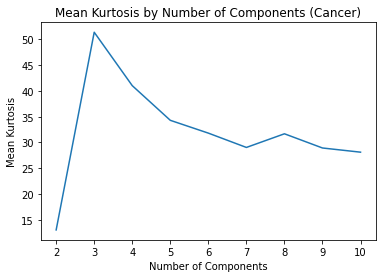

In [138]:
# 2b) ICA
from scipy.stats import kurtosis
from sklearn import datasets
from sklearn.decomposition import FastICA
import time

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data

range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_samples = 100
samples = np.zeros(9)
start_time = time.time()

for sample in range(n_samples):
    for n_components in range_n_components:
        ica = FastICA(n_components=n_components, whiten="arbitrary-variance")
        S_ = ica.fit_transform(X)  # Reconstruct signals
        # print(S_.shape)
        samples[n_components - 2] = samples[n_components - 2] + kurtosis(S_).mean()
end_time = time.time()
avg_time = (end_time-start_time)/(n_samples*len(range_n_components))
print(avg_time)
samples = samples / n_samples
for n_components in range_n_components:
    print("{} components mean kurtosis: {}".format(n_components, samples[n_components-2]))
    
fig_sil, ax_sil = plt.subplots()  # Create a figure containing a single axes.
ax_sil.plot(range_n_components, samples);
ax_sil.set_xlabel("Number of Components")
ax_sil.set_ylabel("Mean Kurtosis")
ax_sil.set_title("Mean Kurtosis by Number of Components (Cancer)")

plt.show()

X.shape: (569, 30)
569 569 86
For n_clusters = 2 The average silhouette_score is : 0.5034300156950473
For n_clusters = 3 The average silhouette_score is : 0.4930644829974441
For n_clusters = 4 The average silhouette_score is : 0.4579251986058094
For n_clusters = 5 The average silhouette_score is : 0.313355942557396
For n_clusters = 6 The average silhouette_score is : 0.3313597886577004
For n_clusters = 7 The average silhouette_score is : 0.33076919696055623
For n_clusters = 8 The average silhouette_score is : 0.3467757617215972
For n_clusters = 9 The average silhouette_score is : 0.3474089070233917
For n_clusters = 10 The average silhouette_score is : 0.34047361308147306


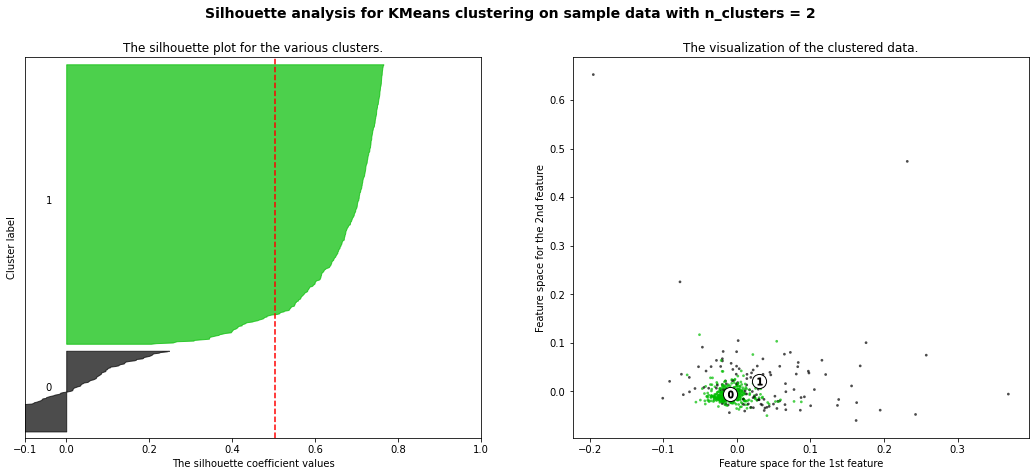

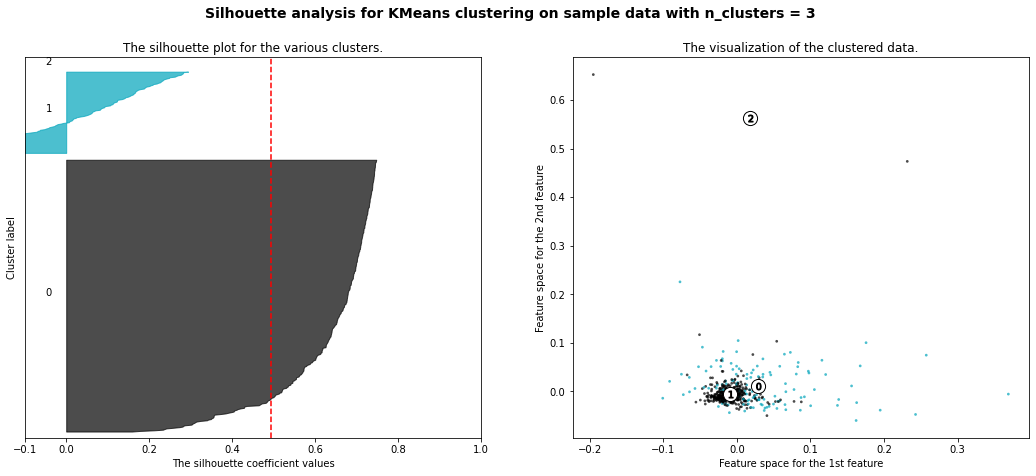

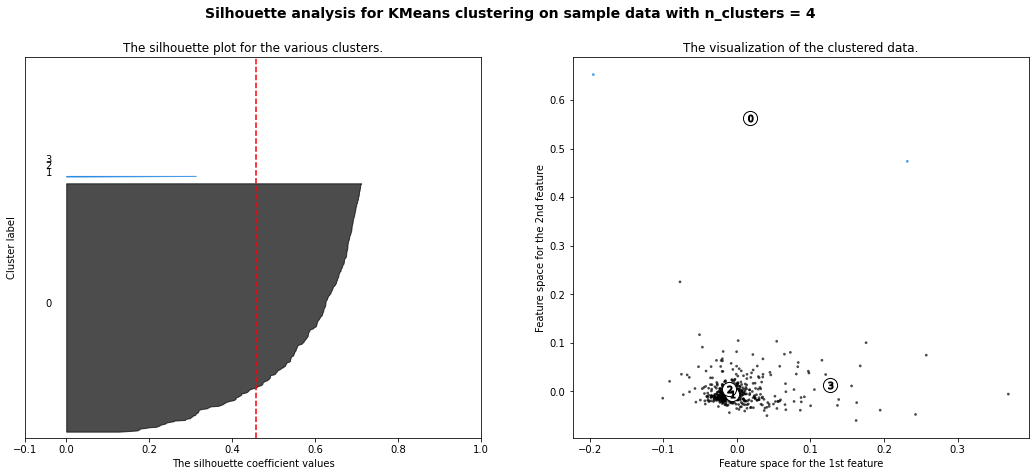

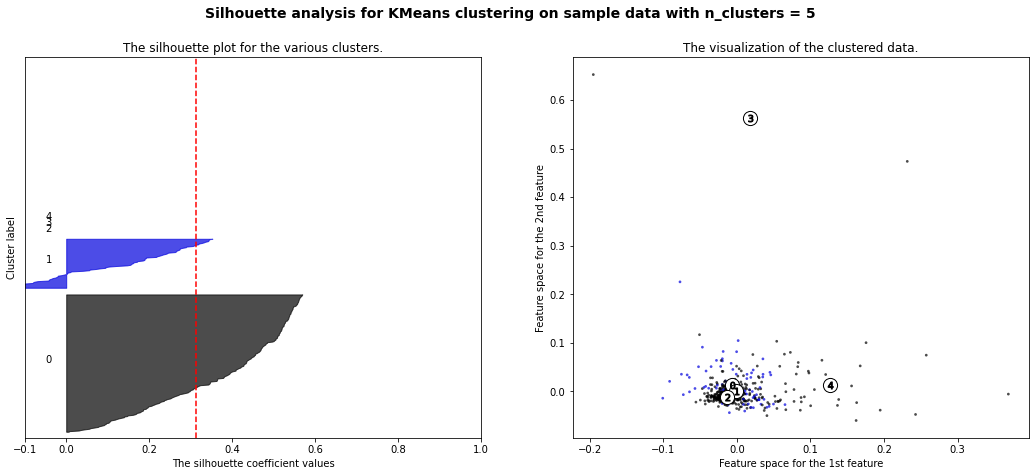

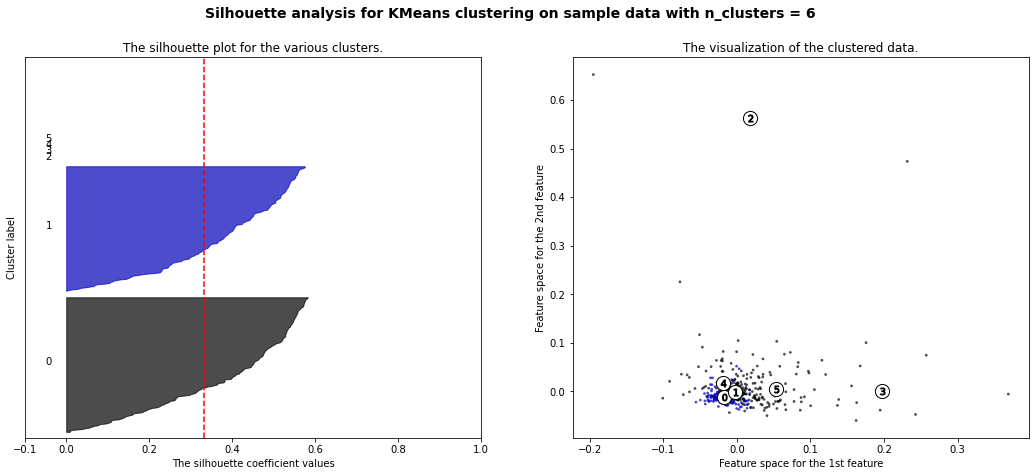

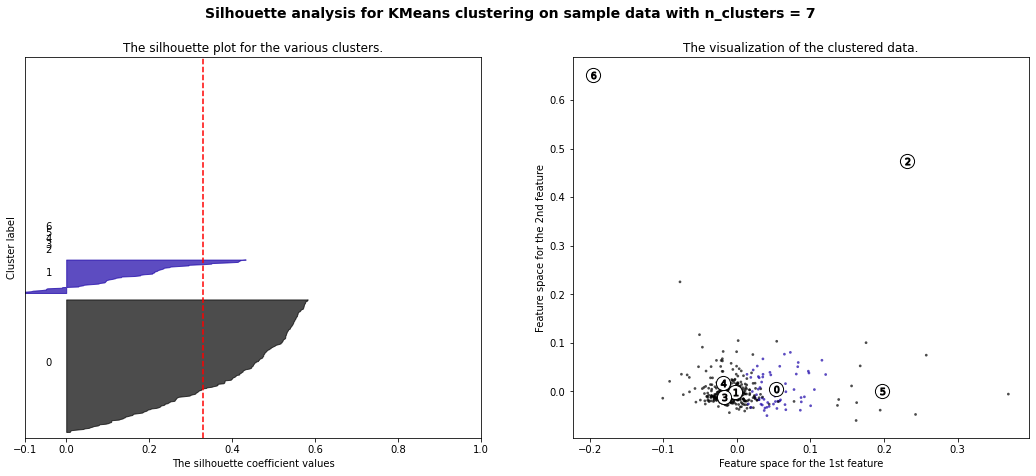

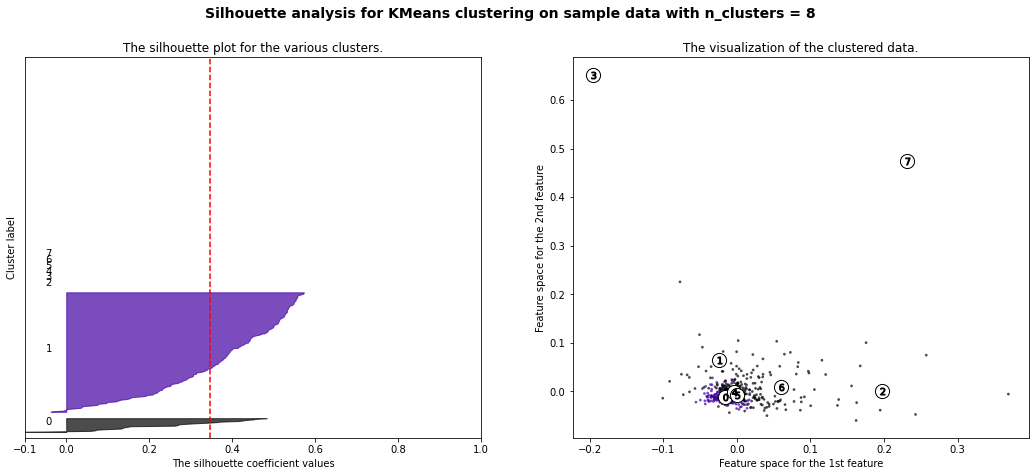

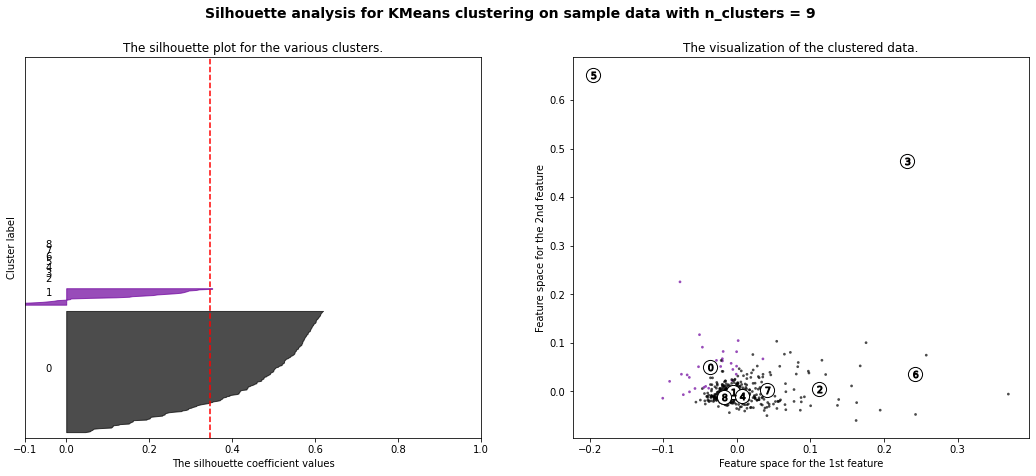

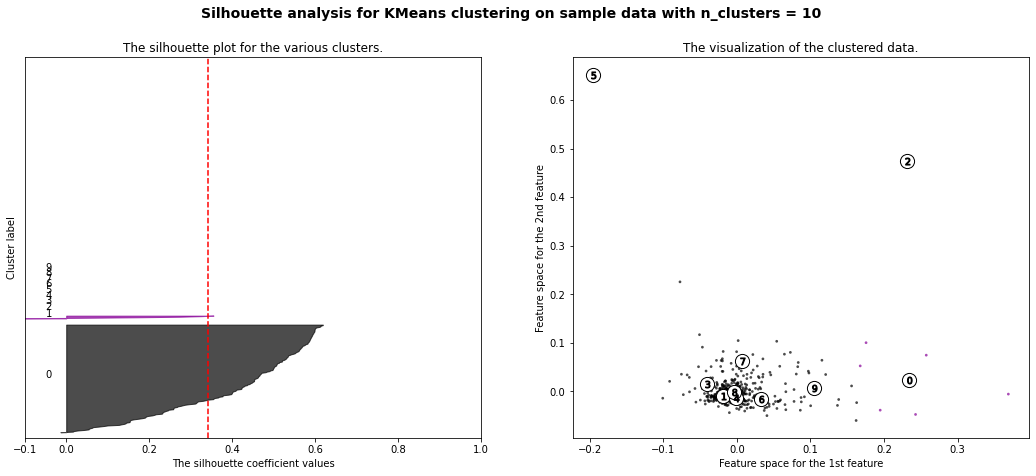

In [103]:
# 3b) k-means clustering on ICA with Breast Cancer data
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# breast cancer data
# X, y = datasets.load_breast_cancer(return_X_y=True)
print("X.shape:", X.shape)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(S_) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(S_)
    cluster_labels = (cluster_labels-1) * -1
    if n_clusters == 2:
        diff = np.absolute(cluster_labels) - np.absolute(y)
        sum_wrong = np.absolute(diff).sum()
        print(len(cluster_labels), len(y), sum_wrong)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(S_, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(S_, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        S_[:, 0], S_[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

569 569 49
For n_clusters = 2 The average silhouette_score is : 0.39902807775556226
For n_clusters = 3 The average silhouette_score is : 0.3927325190362302
For n_clusters = 4 The average silhouette_score is : 0.31669059263640553
For n_clusters = 5 The average silhouette_score is : 0.13867203690051486
For n_clusters = 6 The average silhouette_score is : 0.32463916541681836
For n_clusters = 7 The average silhouette_score is : 0.1715642259237614
For n_clusters = 8 The average silhouette_score is : 0.168322839517735
For n_clusters = 9 The average silhouette_score is : 0.09060792586570422
For n_clusters = 10 The average silhouette_score is : 0.16224299507543696


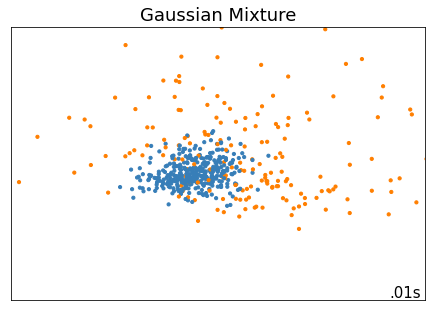

In [124]:
# 3b) Expectation Maximization on ICA with Breast Cancer data
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 500

# X, _ = datasets.load_breast_cancer(return_X_y=True)
# normalize dataset for easier parameter selection
S_ = StandardScaler().fit_transform(S_)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

params = {
    "quantile": 0.3,
    "damping": 0.9,
    "preference": -200,
    "eps": 0.15,
    "n_neighbors": 2,
    "min_samples": 7,
    "xi": 0.1,
    "min_cluster_size": 0.2,
    "n_components": 2,
}



range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_components in range_n_components:
    # Initialize the clusterer with n_clusters
    clusterer = mixture.GaussianMixture(
        n_components=n_components, covariance_type="full"
    )
    cluster_labels = clusterer.fit_predict(S_)
    cluster_labels = (cluster_labels-1) * -1
    if n_components == 2:
        diff = np.absolute(cluster_labels) - np.absolute(y)
        sum_wrong = np.absolute(diff).sum()
        print(len(cluster_labels), len(y), sum_wrong)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(S_, cluster_labels)
    print(
        "For n_clusters =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# ============
# Create cluster objects
# ============
gmm = mixture.GaussianMixture(
    n_components=params["n_components"], covariance_type="full", random_state = 1, max_iter=1000
)


t0 = time.time()

# catch warnings related to kneighbors_graph
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    gmm.fit(S_)

t1 = time.time()
if hasattr(gmm, "labels_"):
    y_pred = gmm.labels_.astype(int)
else:
    y_pred = gmm.predict(S_)

plt.subplot(1, 1, plot_num)
plt.title("Gaussian Mixture", size=18)

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(S_[:, 0], S_[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(
    0.99,
    0.01,
    ("%.2fs" % (t1 - t0)).lstrip("0"),
    transform=plt.gca().transAxes,
    size=15,
    horizontalalignment="right",
)
plot_num += 1

plt.show()

avg_time 0.00040692931208117253
2 components mean error: 57.40950884093645
3 components mean error: 55.3655392405768
4 components mean error: 53.60909083425545
5 components mean error: 51.651053847033815
6 components mean error: 50.85891857091234
7 components mean error: 48.01241159137435
8 components mean error: 44.909336713025326
9 components mean error: 44.36917308309186
10 components mean error: 40.50847241088481
11 components mean error: 37.47911894109228
12 components mean error: 36.32474959083026
13 components mean error: 34.989311034399556
14 components mean error: 31.333190466354342
15 components mean error: 29.89639594312374
16 components mean error: 28.272346052720426
17 components mean error: 25.85432158112693
18 components mean error: 23.602978365765377
19 components mean error: 22.256418032204266
20 components mean error: 18.774879564115565
21 components mean error: 18.960335472313268
22 components mean error: 16.175489071054013
23 components mean error: 15.16855346308846

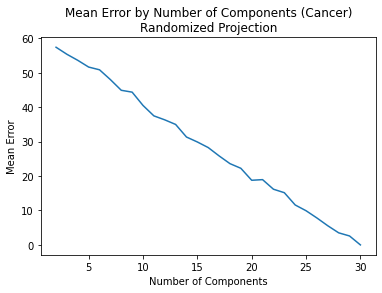

In [139]:
# 2c) Randomized Projection
from sklearn import random_projection
from sklearn import datasets
import time

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data

range_n_components = range(2,31)
n_samples = 500
samples = np.zeros(len(range_n_components))

transformer = random_projection.GaussianRandomProjection(n_components=10, compute_inverse_components=True)
start_time = time.time()
for sample in range(n_samples):
    for n_components in range_n_components:
        transformer.n_components = n_components
        X_new = transformer.fit_transform(X)
        X_new.shape
        # print(X_new.shape)
        X_reconstructed = transformer.inverse_transform(X_new)
        reconstruction_error = X - X_reconstructed
        samples[n_components - 2] = samples[n_components - 2] + reconstruction_error.mean()
end_time = time.time()
avg_time = (end_time-start_time)/(n_samples*len(range_n_components))
print("avg_time",avg_time)
samples = samples / n_samples
for n_components in range_n_components:
    print("{} components mean error: {}".format(n_components, samples[n_components-2]))
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_title("Mean Error by Number of Components (Cancer)\nRandomized Projection")
ax.set_xlabel("Number of Components")
ax.set_ylabel("Mean Error")
ax.plot(range_n_components, samples);

X.shape: (569, 30)
For n_clusters = 2 The average silhouette_score is : 0.720724531531317
For n_clusters = 3 The average silhouette_score is : 0.6964841910337956
For n_clusters = 4 The average silhouette_score is : 0.6244151793548054
For n_clusters = 5 The average silhouette_score is : 0.625950788585965
For n_clusters = 6 The average silhouette_score is : 0.5935338825670362
For n_clusters = 7 The average silhouette_score is : 0.4824973504821433
For n_clusters = 8 The average silhouette_score is : 0.44521104260667976
For n_clusters = 9 The average silhouette_score is : 0.4446758723075301
For n_clusters = 10 The average silhouette_score is : 0.455334880613243


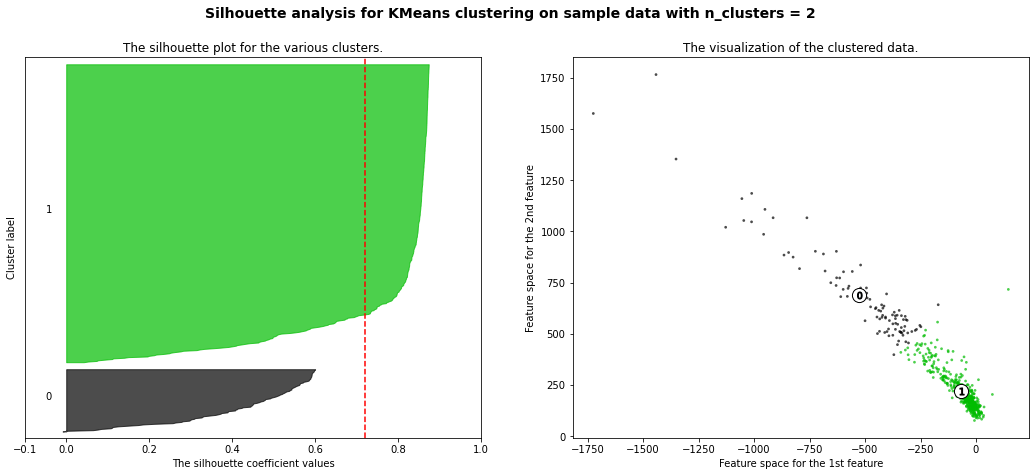

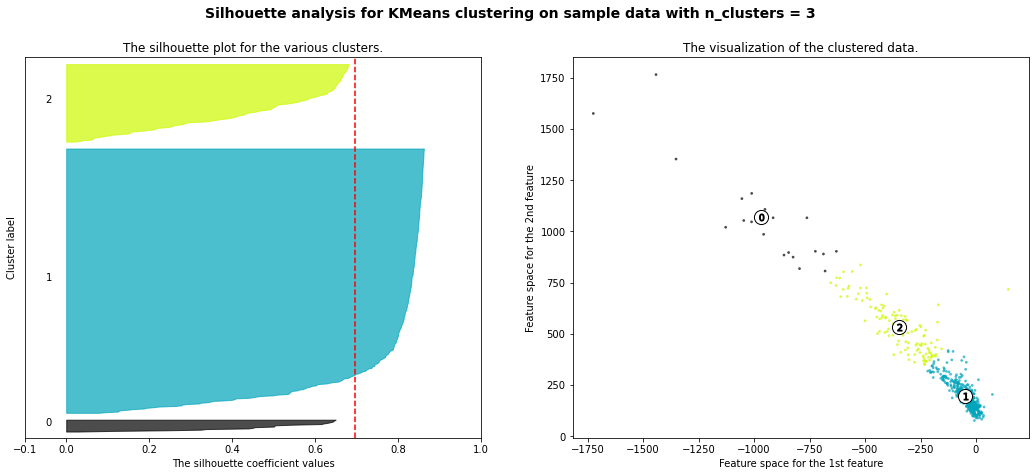

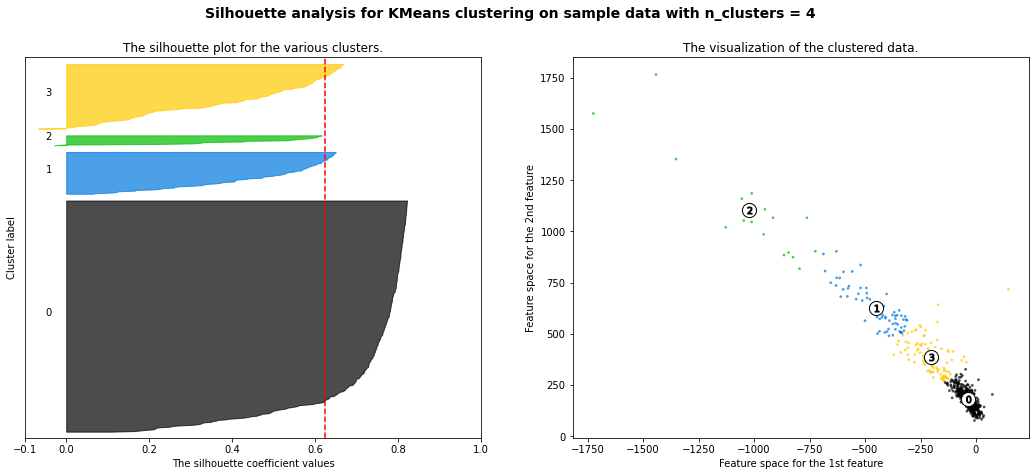

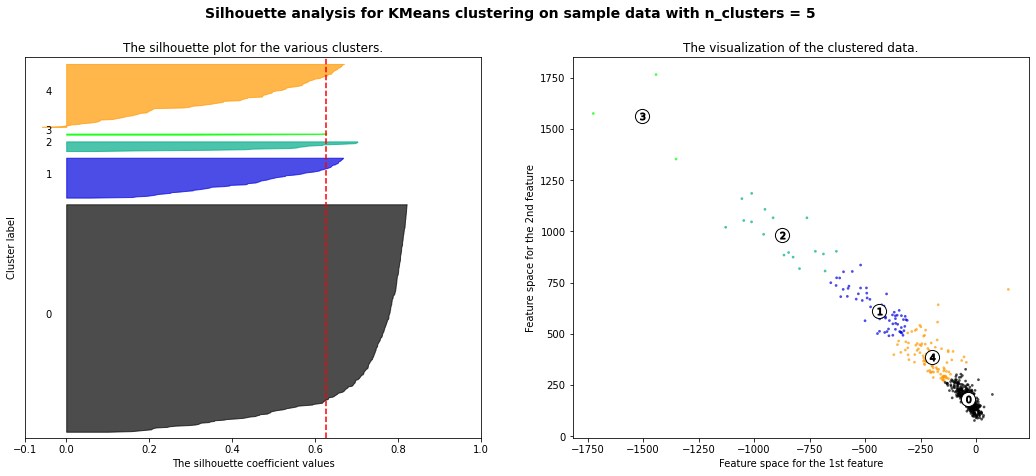

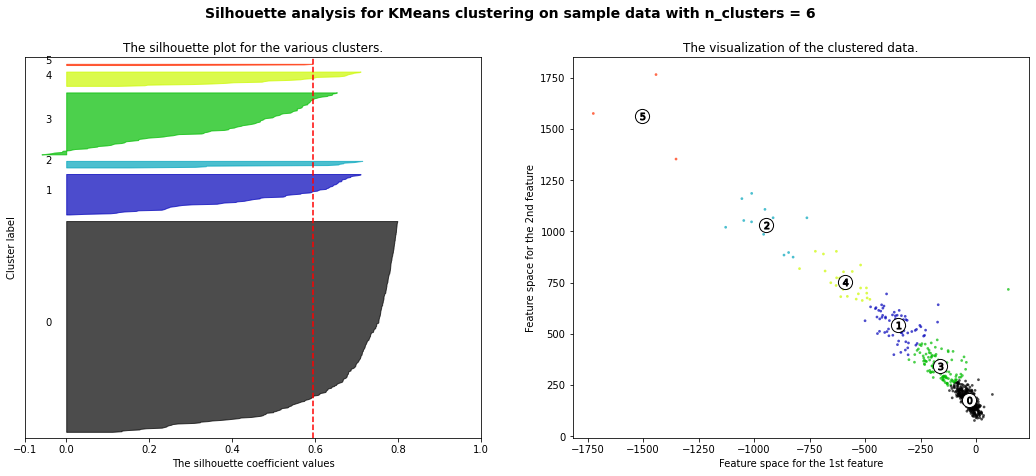

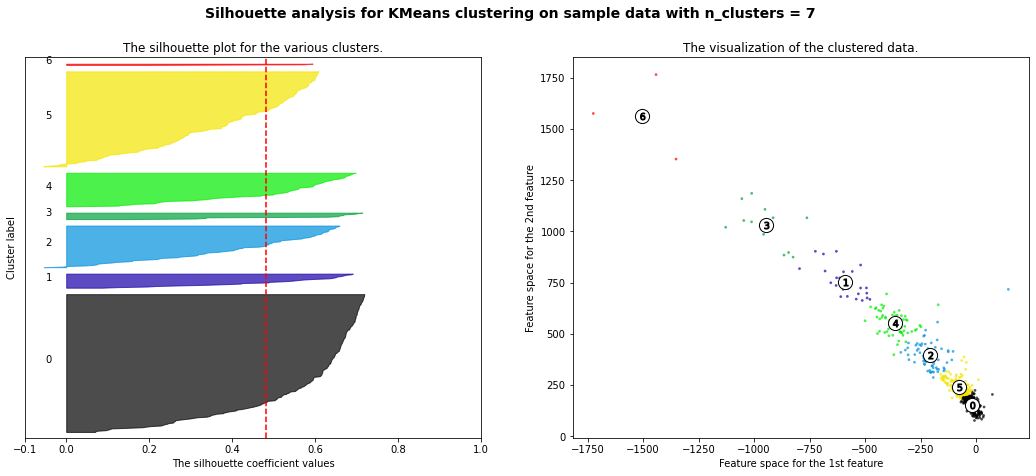

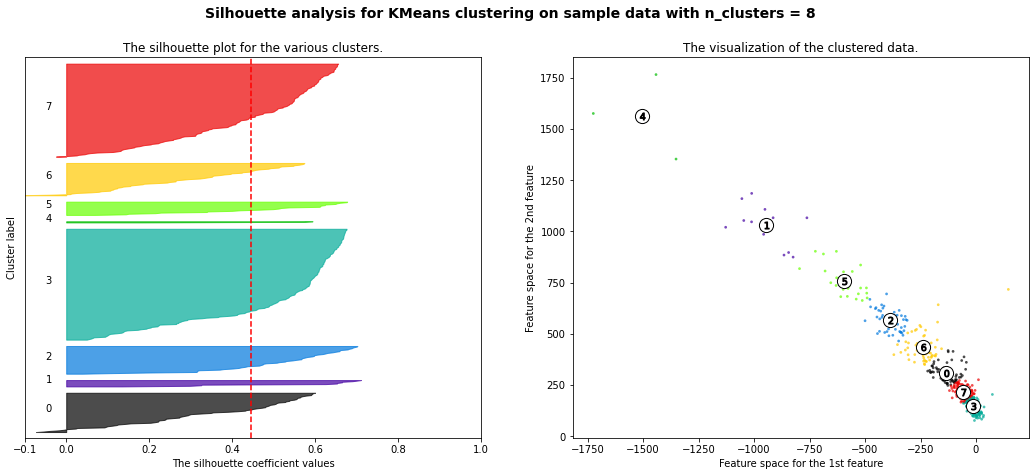

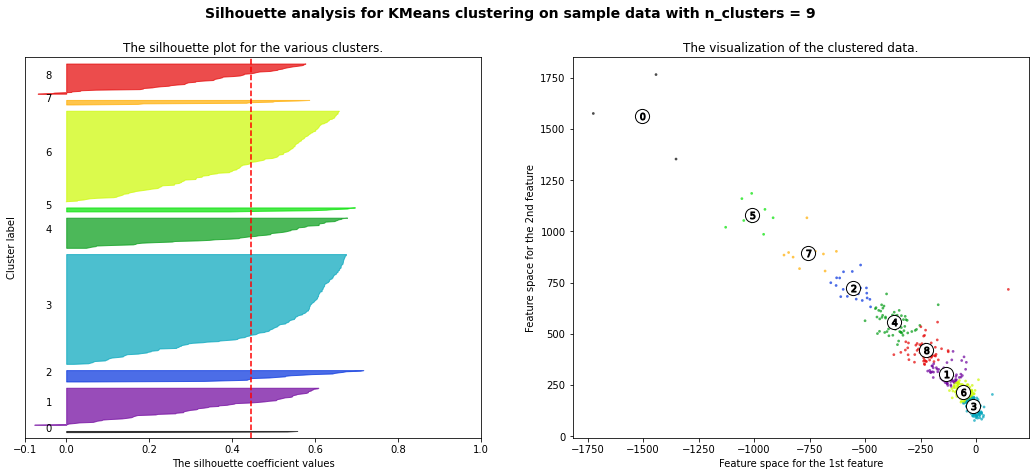

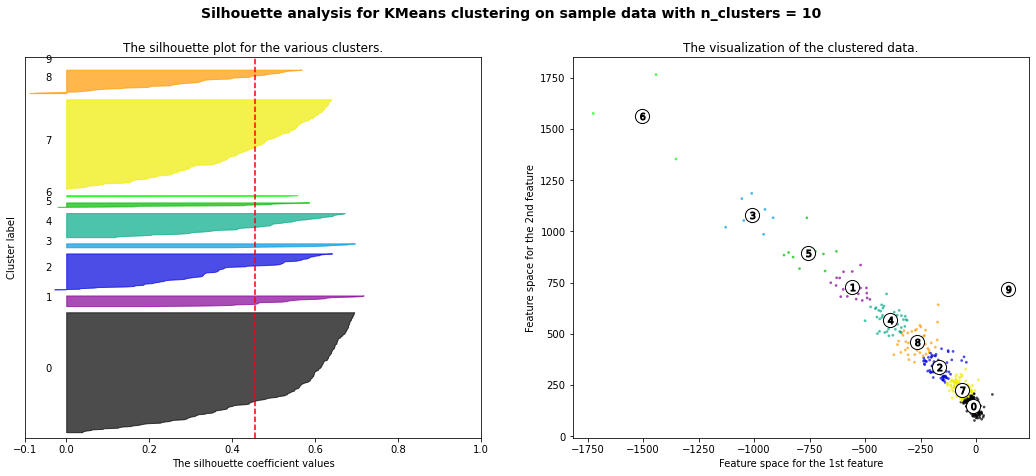

In [337]:
# 3c) k-means clustering on Randomized Projection with Breast Cancer data
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# breast cancer data
# X, y = datasets.load_breast_cancer(return_X_y=True)
print("X.shape:", X.shape)
transformer = random_projection.GaussianRandomProjection(n_components=2, compute_inverse_components=True)
X_new = transformer.fit_transform(X)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_new[:, 0], X_new[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31460247771316996
For n_clusters = 3 The average silhouette_score is : 0.2496855269852042
For n_clusters = 4 The average silhouette_score is : 0.2245981464561483
For n_clusters = 5 The average silhouette_score is : 0.12970033359090188
For n_clusters = 6 The average silhouette_score is : 0.10789166521970481
For n_clusters = 7 The average silhouette_score is : 0.12027558316720327
For n_clusters = 8 The average silhouette_score is : 0.11862399195573985
For n_clusters = 9 The average silhouette_score is : 0.11440556984236426
For n_clusters = 10 The average silhouette_score is : 0.11445656043965718


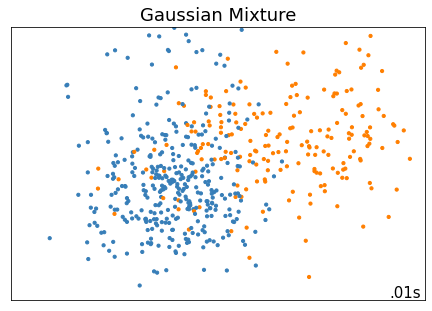

In [338]:
# 3c) Expectation Maximization on Randomized Projection with Breast Cancer data
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 500

# X, _ = datasets.load_breast_cancer(return_X_y=True)
# normalize dataset for easier parameter selection
X_new = StandardScaler().fit_transform(X)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

params = {
    "quantile": 0.3,
    "damping": 0.9,
    "preference": -200,
    "eps": 0.15,
    "n_neighbors": 2,
    "min_samples": 7,
    "xi": 0.1,
    "min_cluster_size": 0.2,
    "n_components": 2,
}



range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_components in range_n_components:
    # Initialize the clusterer with n_clusters
    clusterer = mixture.GaussianMixture(
        n_components=n_components, covariance_type="full"
    )
    cluster_labels = clusterer.fit_predict(X_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print(
        "For n_clusters =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# ============
# Create cluster objects
# ============
gmm = mixture.GaussianMixture(
    n_components=params["n_components"], covariance_type="full", random_state = 1, max_iter=1000
)


t0 = time.time()

# catch warnings related to kneighbors_graph
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    gmm.fit(X_new)

t1 = time.time()
if hasattr(gmm, "labels_"):
    y_pred = gmm.labels_.astype(int)
else:
    y_pred = gmm.predict(X_new)

plt.subplot(1, 1, plot_num)
plt.title("Gaussian Mixture", size=18)

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X_new[:, 0], X_new[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(
    0.99,
    0.01,
    ("%.2fs" % (t1 - t0)).lstrip("0"),
    transform=plt.gca().transAxes,
    size=15,
    horizontalalignment="right",
)
plot_num += 1

plt.show()

circles, perplexity=5 in 0.32 sec
circles, perplexity=50 in 0.38 sec
circles, perplexity=100 in 0.55 sec
circles, perplexity=150 in 0.77 sec
avg_time 0.5107959508895874


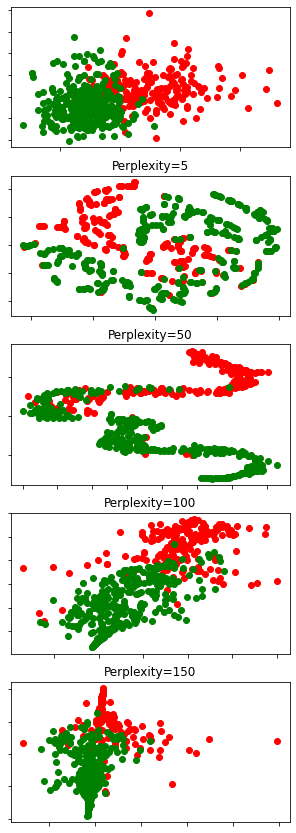

In [142]:
# 2d) t-SNE

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
# (fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
(fig, subplots) = plt.subplots(5, figsize=(5, 15))
perplexities = [5, 50, 100, 150]

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

red = y == 0
green = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

start_time = time()
for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
end_time = time()
avg_time = (end_time-start_time)/len(perplexities)
print("avg_time", avg_time)

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6215697
For n_clusters = 3 The average silhouette_score is : 0.5959229
For n_clusters = 4 The average silhouette_score is : 0.58513814
For n_clusters = 5 The average silhouette_score is : 0.5659757
For n_clusters = 6 The average silhouette_score is : 0.54918134
For n_clusters = 7 The average silhouette_score is : 0.5381276
For n_clusters = 8 The average silhouette_score is : 0.54991454
For n_clusters = 9 The average silhouette_score is : 0.5533824
For n_clusters = 10 The average silhouette_score is : 0.540539


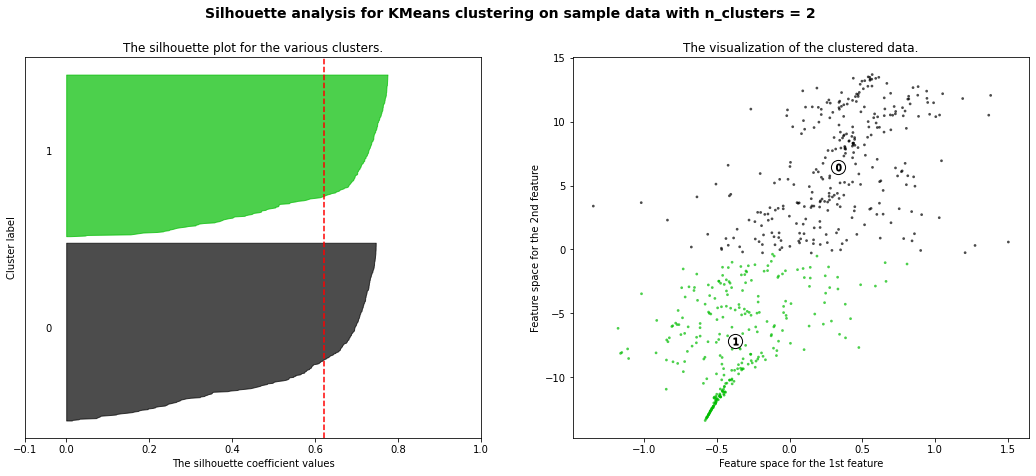

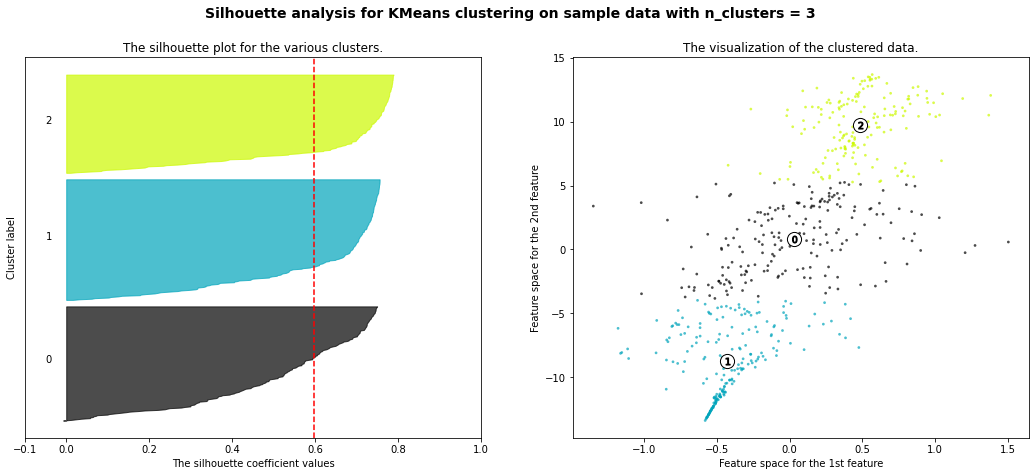

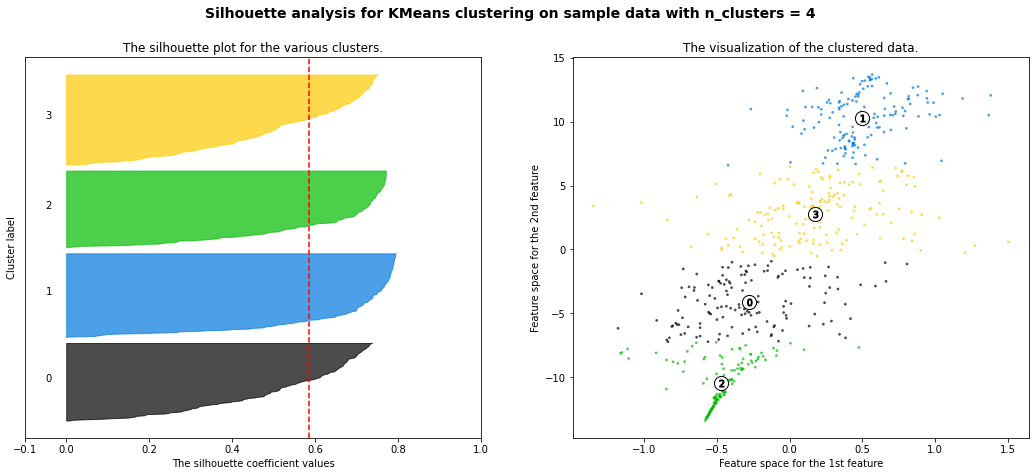

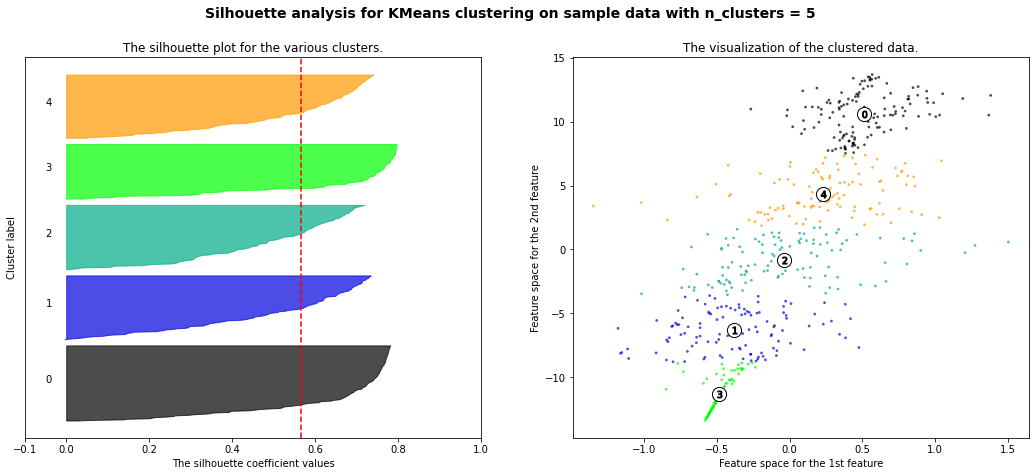

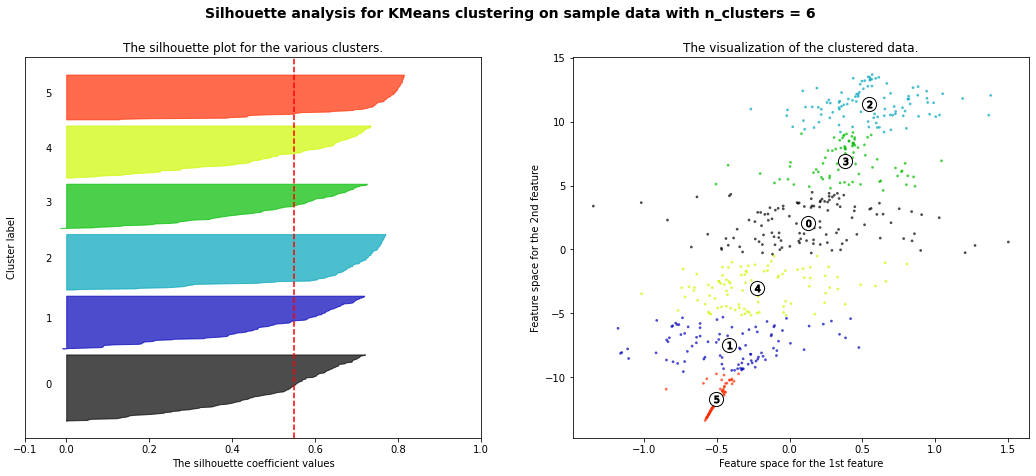

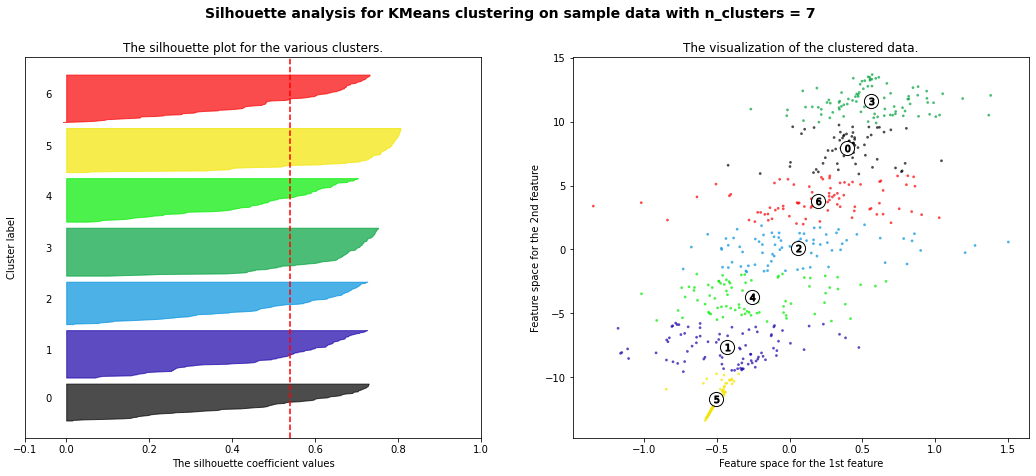

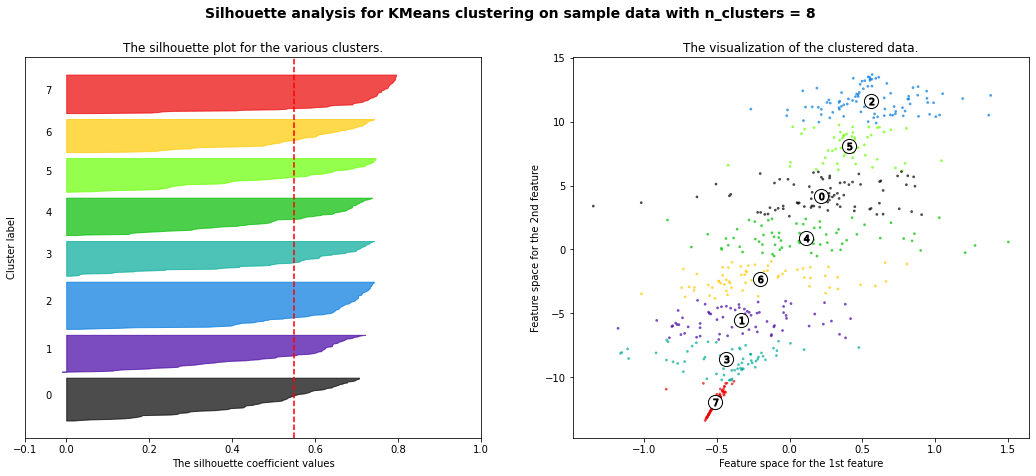

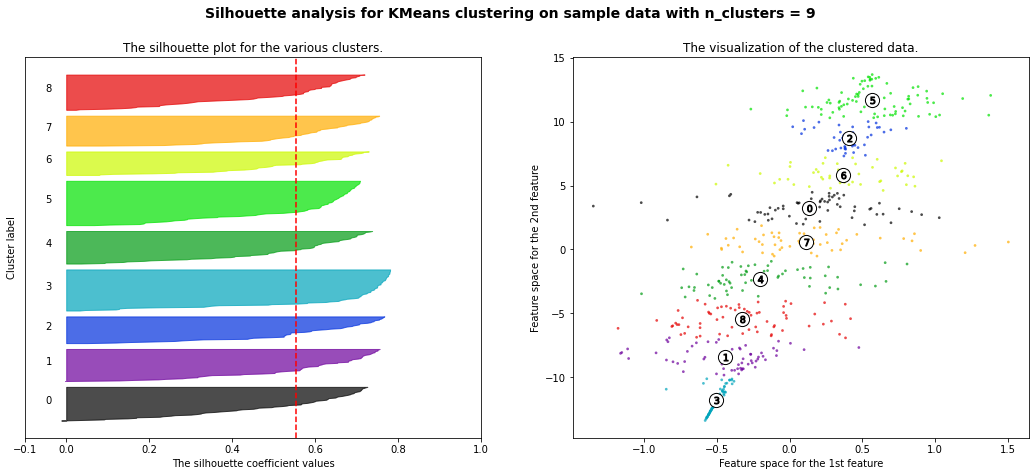

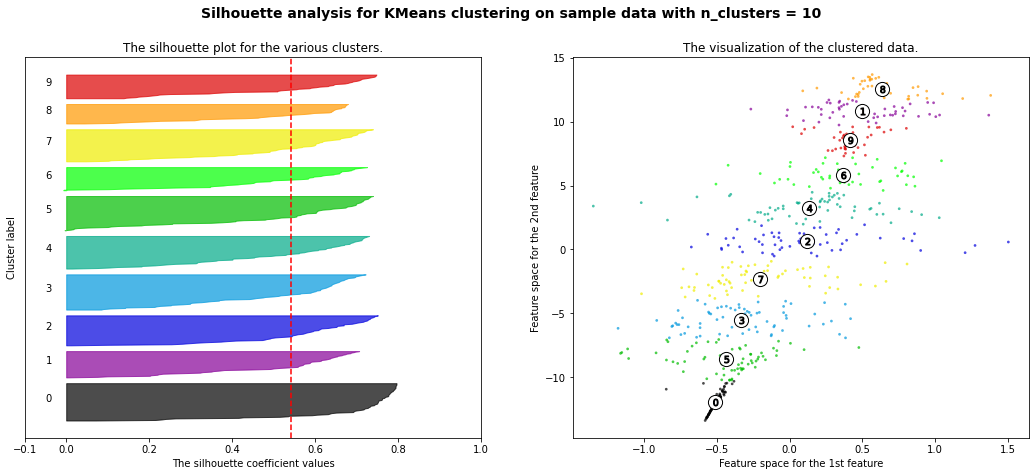

In [129]:
# 3d) k-means clustering on t-SNE with Breast Cancer data
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

red = y == 0
green = y == 1

# ax = subplots[0]
# ax.scatter(X[red, 0], X[red, 1], c="r")
# ax.scatter(X[green, 0], X[green, 1], c="g")
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis("tight")

# ax = subplots[i + 1]

t0 = time()
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=100,
    learning_rate="auto",
    n_iter=300,
)
Y_new = tsne.fit_transform(X)
    
range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(Y_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_new, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Y_new[:, 0], Y_new[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_components = 2 The average silhouette_score is : 0.52435815
For n_components = 3 The average silhouette_score is : 0.31941944
For n_components = 4 The average silhouette_score is : 0.18491365
For n_components = 5 The average silhouette_score is : 0.23530707
For n_components = 6 The average silhouette_score is : 0.20162511
For n_components = 7 The average silhouette_score is : 0.31055427
For n_components = 8 The average silhouette_score is : 0.2334148
For n_components = 9 The average silhouette_score is : 0.3343126
For n_components = 10 The average silhouette_score is : 0.3395903


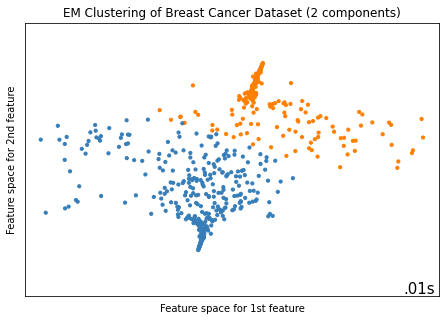

In [134]:
# 3d) Expectation Maximization on t-SNE with Breast Cancer data
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 500

# X, _ = datasets.load_breast_cancer(return_X_y=True)
# normalize dataset for easier parameter selection
Y_new = StandardScaler().fit_transform(Y)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

params = {
    "quantile": 0.3,
    "damping": 0.9,
    "preference": -200,
    "eps": 0.15,
    "n_neighbors": 2,
    "min_samples": 7,
    "xi": 0.1,
    "min_cluster_size": 0.2,
    "n_components": 2,
}



range_n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_components in range_n_components:
    # Initialize the clusterer with n_clusters
    clusterer = mixture.GaussianMixture(
        n_components=n_components, covariance_type="full"
    )
    cluster_labels = clusterer.fit_predict(Y_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_new, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# ============
# Create cluster objects
# ============
gmm = mixture.GaussianMixture(
    n_components=params["n_components"], covariance_type="full", random_state = 1, max_iter=1000
)


t0 = time.time()

# catch warnings related to kneighbors_graph
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
    )
    warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
    )
    gmm.fit(Y_new)

t1 = time.time()
if hasattr(gmm, "labels_"):
    y_pred = gmm.labels_.astype(int)
else:
    y_pred = gmm.predict(Y_new)

plt.subplot(1, 1, plot_num)
plt.title("EM Clustering of Breast Cancer Dataset (2 components)")
plt.xlabel("Feature space for 1st feature")
plt.ylabel("Feature space for 2nd feature")

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(Y_new[:, 0], Y_new[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(
    0.99,
    0.01,
    ("%.2fs" % (t1 - t0)).lstrip("0"),
    transform=plt.gca().transAxes,
    size=15,
    horizontalalignment="right",
)
plot_num += 1

plt.show()

n_samples: 569 

X_train.shape: (284, 30)
Wall clock time (training):  0.4480888843536377 seconds

Wall clock time (cross validating):  0.43412303924560547 seconds

Wall clock time (prediction):  0.0007579326629638672 seconds

0.92 macro avg precision on TRAINING data with a standard deviation of 0.03

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=20000,
              random_state=1) on TEST data:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       112
           1       0.90      0.98      0.94       173

    accuracy                           0.92       285
   macro avg       0.93      0.90      0.91       285
weighted avg       0.92      0.92      0.92       285


Confusion matrix:
[[ 93  19]
 [  4 169]]


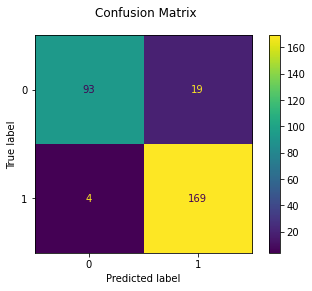

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[]

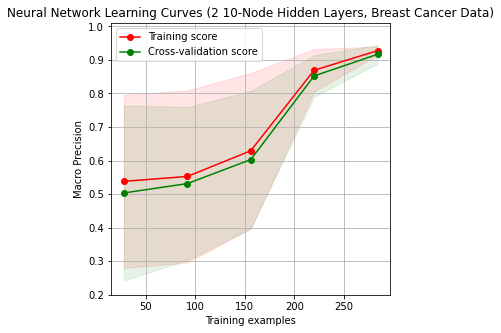

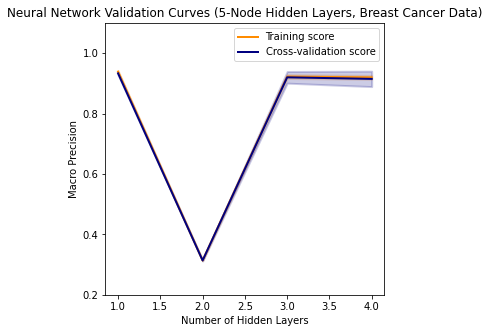

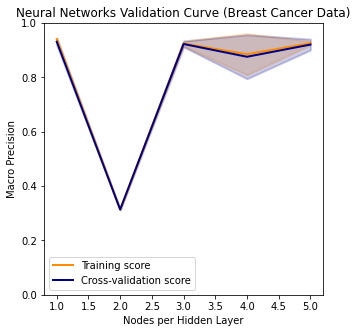

In [53]:
# Original NEURAL NETWORK


# Standard scientific Python imports
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1, max_iter=20000)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

print("X_train.shape:", X_train.shape)

# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()
print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Neural Network Learning Curves (2 10-Node Hidden Layers, Breast Cancer Data)"

axes.set_title(title)

ylim=(0.2, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(5), (5,5), (5, 5, 5), (5, 5, 5, 5)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=[1, 2, 3, 4],
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Network Validation Curves (5-Node Hidden Layers, Breast Cancer Data)")
axes.set_xlabel(r"Number of Hidden Layers")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.2, 1.1)
lw = 2
axes.plot(
    [1, 2, 3, 4], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    [1, 2, 3, 4], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()




##################################################




clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1, max_iter=20000)



# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(i, i) for i in range(1,6)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Networks Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Nodes per Hidden Layer")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.0)
lw = 2
axes.plot(
    range(1,6), train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    range(1,6),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    range(1,6), test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    range(1,6),
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

n_samples: 569 

X_train.shape: (284, 2)
Wall clock time (training):  0.045564889907836914 seconds

Wall clock time (cross validating):  0.07550740242004395 seconds

Wall clock time (prediction):  0.0003108978271484375 seconds

0.87 macro avg precision on TRAINING data with a standard deviation of 0.05

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=20000,
              random_state=1) on TEST data:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       101
           1       0.90      0.91      0.91       184

    accuracy                           0.88       285
   macro avg       0.87      0.86      0.86       285
weighted avg       0.88      0.88      0.88       285


Confusion matrix:
[[ 82  19]
 [ 16 168]]


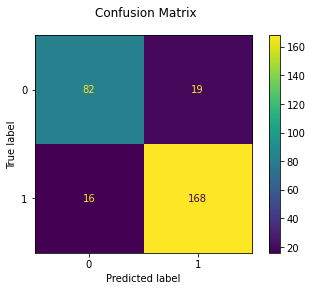

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[]

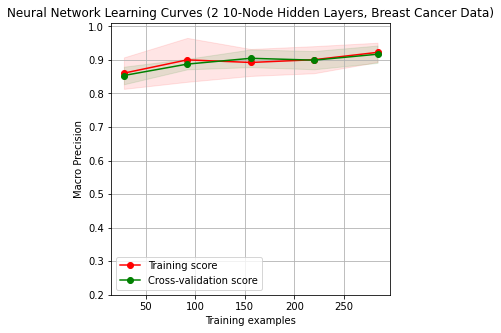

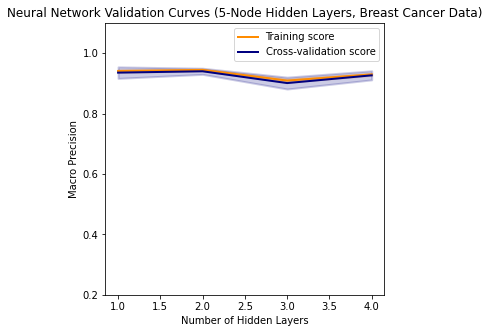

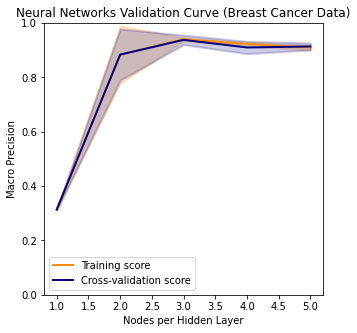

In [63]:
# 4 NEURAL NETWORK with reduced dimensionality


# Standard scientific Python imports
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
pca = PCA(n_components=2)
X = pca.fit(X).transform(X)

    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1, max_iter=20000)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

print("X_train.shape:", X_train.shape)

# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()
print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Neural Network Learning Curves (2 10-Node Hidden Layers, Breast Cancer Data)"

axes.set_title(title)

ylim=(0.2, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(5), (5,5), (5, 5, 5), (5, 5, 5, 5)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=[1, 2, 3, 4],
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Network Validation Curves (5-Node Hidden Layers, Breast Cancer Data)")
axes.set_xlabel(r"Number of Hidden Layers")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.2, 1.1)
lw = 2
axes.plot(
    [1, 2, 3, 4], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    [1, 2, 3, 4], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()




##################################################




clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1, max_iter=20000)



# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(i, i) for i in range(1,6)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Networks Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Nodes per Hidden Layer")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.0)
lw = 2
axes.plot(
    range(1,6), train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    range(1,6),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    range(1,6), test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    range(1,6),
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

(569, 2)
(569,)
(569, 1)
n_samples: 569 

X_train.shape: (284, 3)
Wall clock time (training):  0.2109208106994629 seconds

Wall clock time (cross validating):  0.2330491542816162 seconds

Wall clock time (prediction):  0.0006198883056640625 seconds

0.93 macro avg precision on TRAINING data with a standard deviation of 0.05

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=20000,
              random_state=1) on TEST data:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       115
           1       0.94      0.95      0.94       170

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285


Confusion matrix:
[[104  11]
 [  8 162]]


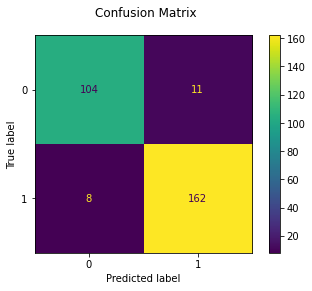

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[]

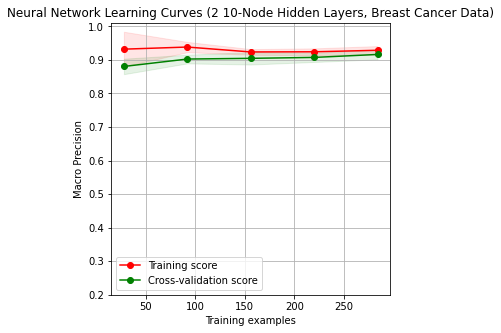

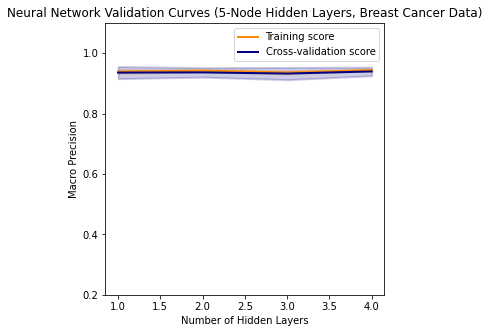

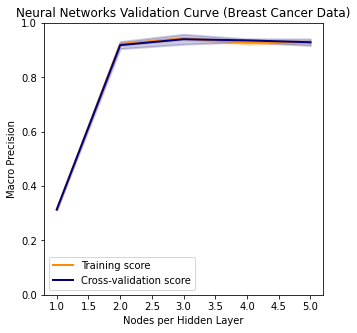

In [73]:
# 5 NEURAL NETWORK with cluster info


# Standard scientific Python imports
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
pca = PCA(n_components=2)
X = pca.fit(X).transform(X)
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(X.shape)
print(cluster_labels.shape)
length = len(cluster_labels)
cluster_labels = np.reshape(cluster_labels, (length, 1))
print(cluster_labels.shape)
X = np.hstack((X, cluster_labels))
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1, max_iter=20000)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

print("X_train.shape:", X_train.shape)

# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()
print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Neural Network Learning Curves (2 10-Node Hidden Layers, Breast Cancer Data)"

axes.set_title(title)

ylim=(0.2, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(5), (5,5), (5, 5, 5), (5, 5, 5, 5)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=[1, 2, 3, 4],
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Network Validation Curves (5-Node Hidden Layers, Breast Cancer Data)")
axes.set_xlabel(r"Number of Hidden Layers")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.2, 1.1)
lw = 2
axes.plot(
    [1, 2, 3, 4], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    [1, 2, 3, 4], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()




##################################################




clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1, max_iter=20000)



# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(i, i) for i in range(1,6)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Networks Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Nodes per Hidden Layer")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.0)
lw = 2
axes.plot(
    range(1,6), train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    range(1,6),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    range(1,6), test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    range(1,6),
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()